In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.float_format='{:,.2f}'.format
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [3]:
df=pd.read_csv(r"C:\Users\mohaa\Desktop\supermarket_sales - Sheet1.csv")
df.sample(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
354,320-49-6392,C,Naypyitaw,Normal,Female,Electronic accessories,30.24,1,1.51,31.75,3/4/2019,15:44,Cash,30.24,4.76,1.51,8.40
865,176-78-1170,C,Naypyitaw,Member,Male,Health and beauty,33.81,3,5.07,106.50,1/26/2019,15:11,Ewallet,101.43,4.76,5.07,7.30
709,445-30-9252,A,Yangon,Normal,Male,Sports and travel,25.70,3,3.85,80.95,1/17/2019,17:59,Ewallet,77.10,4.76,3.85,6.10
512,595-27-4851,A,Yangon,Normal,Female,Fashion accessories,54.28,7,19.00,398.96,1/27/2019,18:05,Ewallet,379.96,4.76,19.00,9.30
708,760-27-5490,C,Naypyitaw,Normal,Male,Fashion accessories,15.62,8,6.25,131.21,1/20/2019,20:37,Ewallet,124.96,4.76,6.25,9.10
501,573-98-8548,C,Naypyitaw,Member,Female,Fashion accessories,31.90,1,1.59,33.49,1/5/2019,12:40,Ewallet,31.90,4.76,1.59,9.10
315,174-36-3675,C,Naypyitaw,Member,Male,Food and beverages,99.37,2,9.94,208.68,2/14/2019,17:29,Cash,198.74,4.76,9.94,5.20
270,783-09-1637,B,Mandalay,Normal,Female,Sports and travel,67.43,5,16.86,354.01,3/6/2019,18:13,Ewallet,337.15,4.76,16.86,6.30
595,470-31-3286,B,Mandalay,Normal,Male,Health and beauty,14.82,3,2.22,46.68,3/1/2019,11:30,Credit card,44.46,4.76,2.22,8.70
976,221-25-5073,A,Yangon,Normal,Female,Food and beverages,74.66,4,14.93,313.57,3/4/2019,10:39,Cash,298.64,4.76,14.93,8.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
cols=['Branch','City','Customer type','Gender','Payment','Product line']

for col in cols:
    print(f"{col} unique value = {df[col].unique()}")
    print("**************************")

Branch unique value = ['A' 'C' 'B']
**************************
City unique value = ['Yangon' 'Naypyitaw' 'Mandalay']
**************************
Customer type unique value = ['Member' 'Normal']
**************************
Gender unique value = ['Female' 'Male']
**************************
Payment unique value = ['Ewallet' 'Cash' 'Credit card']
**************************
Product line unique value = ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
**************************


In [7]:
df.Date=pd.to_datetime(df.Date)
df.Time=pd.to_datetime(df.Time)

C:\Users\mohaa\AppData\Local\Temp\ipykernel_56208\2104285443.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Time=pd.to_datetime(df.Time)


In [8]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.strip()

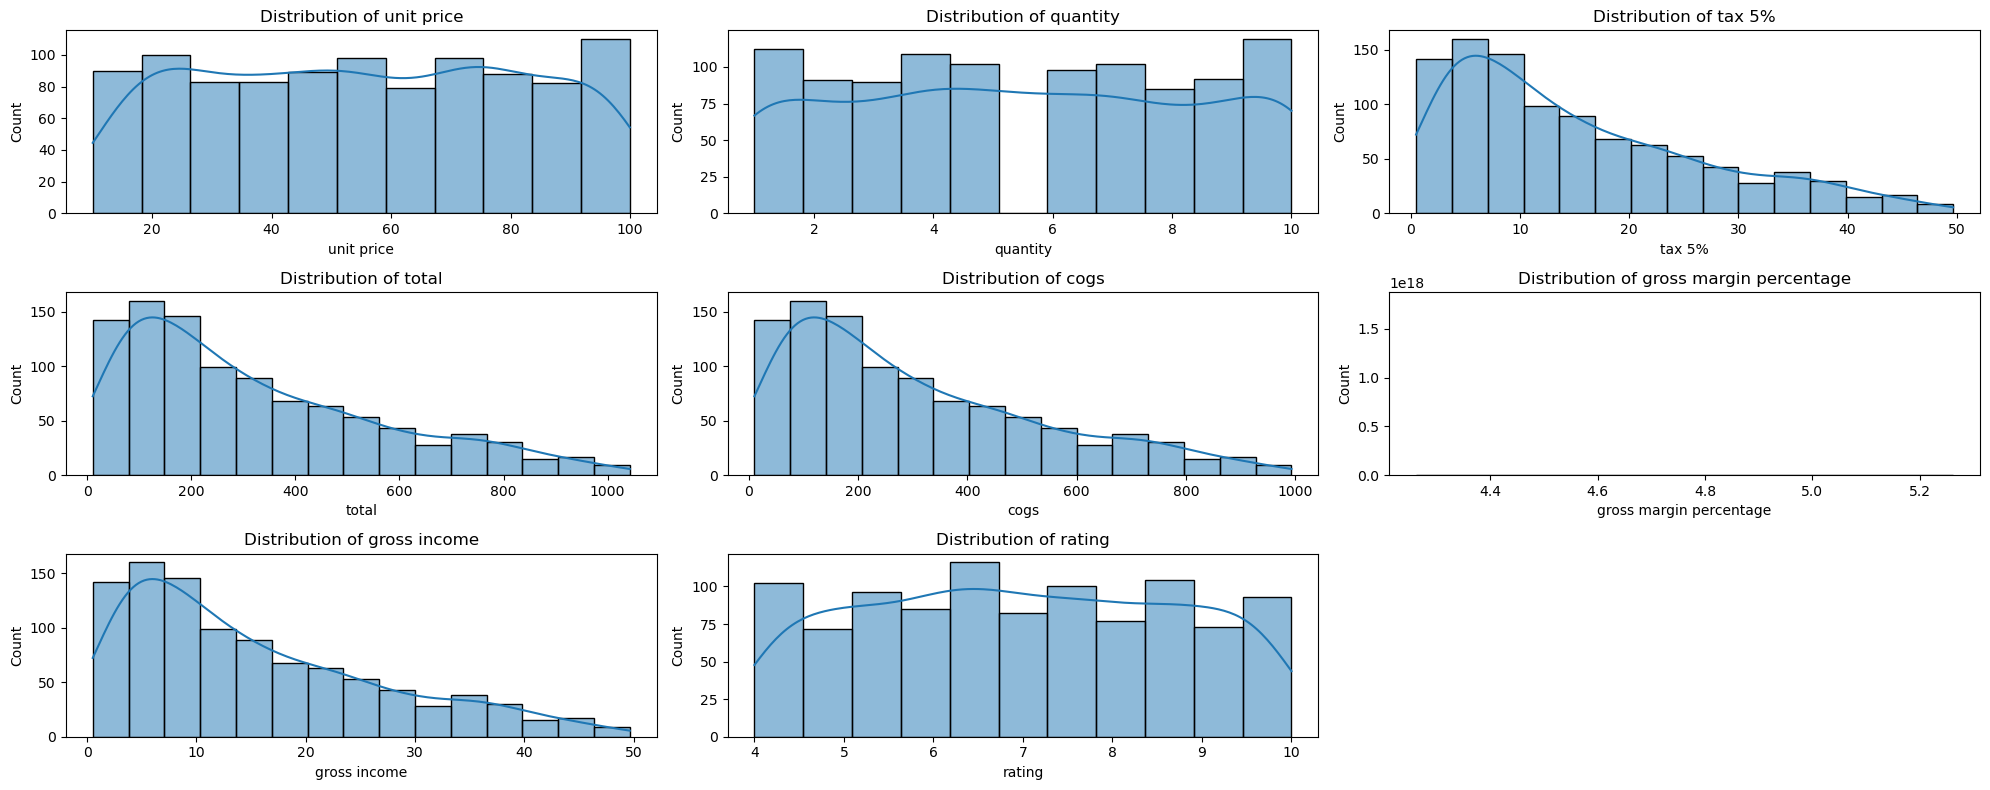

In [11]:
n_cols=df.select_dtypes('number')
plt.figure(figsize=(20,8))
for e,i in enumerate(n_cols.columns):
    plt.subplot(3,3,e+1)
    sns.histplot(n_cols[i],kde=True)
    plt.title('Distribution of ' +i)
    plt.tight_layout()

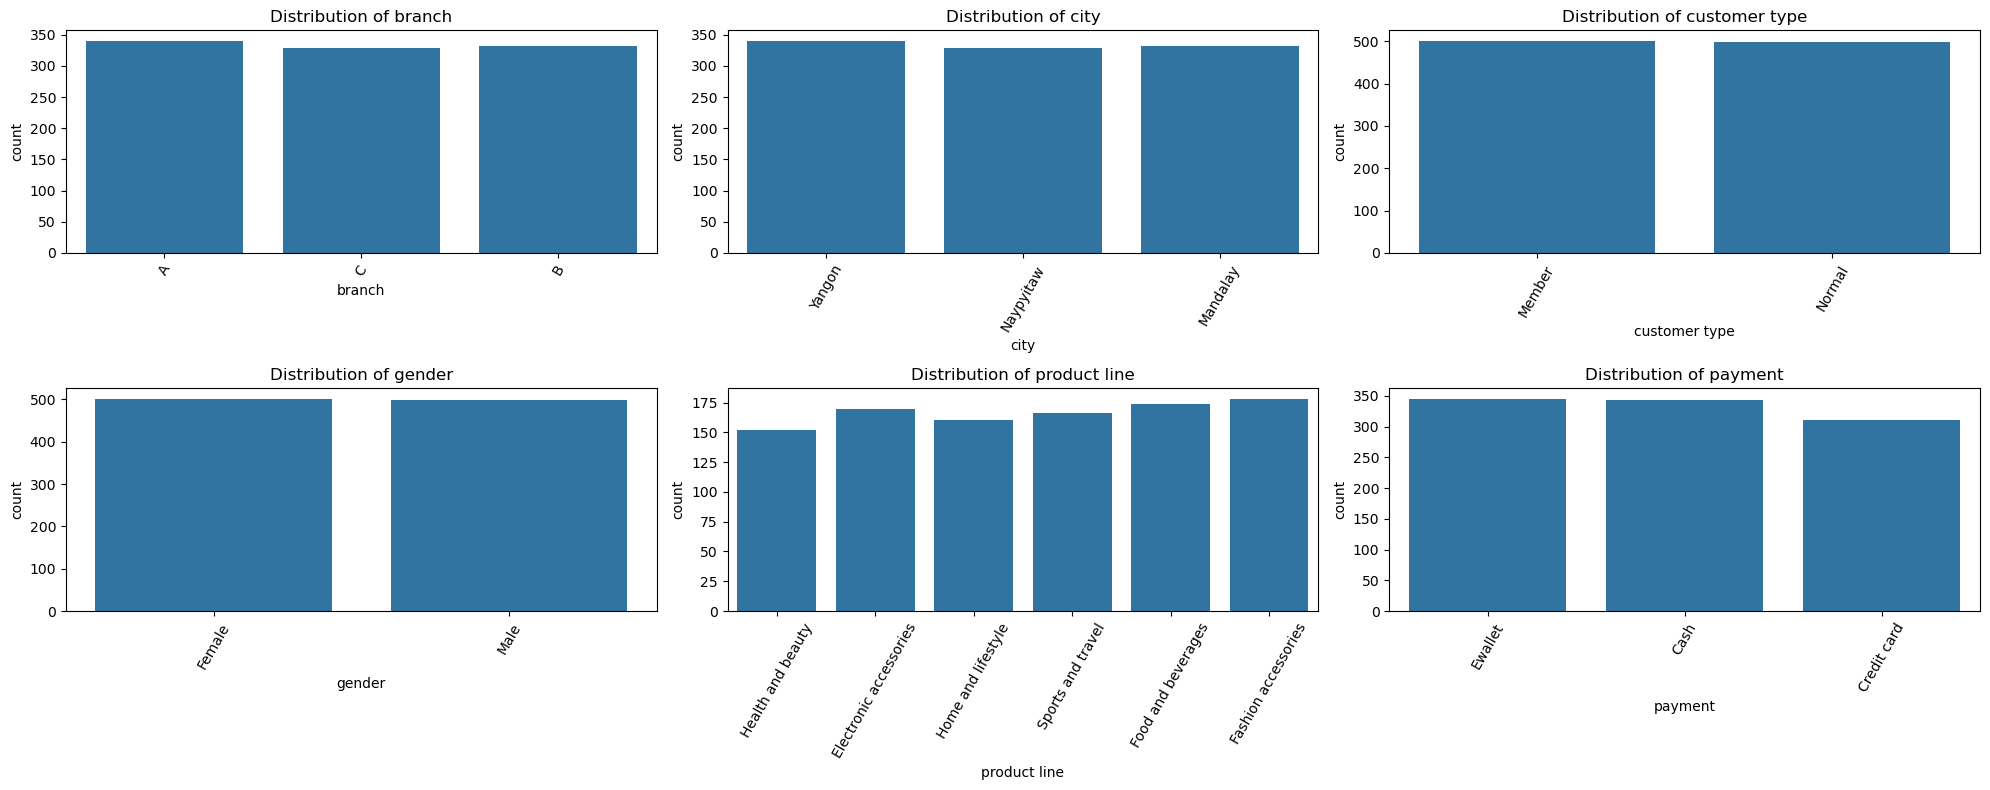

In [16]:
s_cols=df.select_dtypes('object')
s_cols=s_cols.iloc[:,1:]
plt.figure(figsize=(20,8))
for e,i in enumerate(s_cols.columns):
    plt.subplot(2,3,e+1)
    sns.countplot(data=s_cols,x=i)
    palette = sns.color_palette("Set2", n_colors=s_cols[i].nunique())
    plt.title('Distribution of ' +i)
    plt.xticks(rotation=60)
    plt.tight_layout()

C:\Users\mohaa\AppData\Local\Temp\ipykernel_56208\2934281266.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=s_cols, x=i, palette=palette)
C:\Users\mohaa\AppData\Local\Temp\ipykernel_56208\2934281266.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=s_cols, x=i, palette=palette)
C:\Users\mohaa\AppData\Local\Temp\ipykernel_56208\2934281266.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=s_cols, x=i, palette=palette)
C:\Users\mohaa\AppData\Local\Temp\ipykernel_56208\2934281266.py:12: FutureWarning: 

Passing `

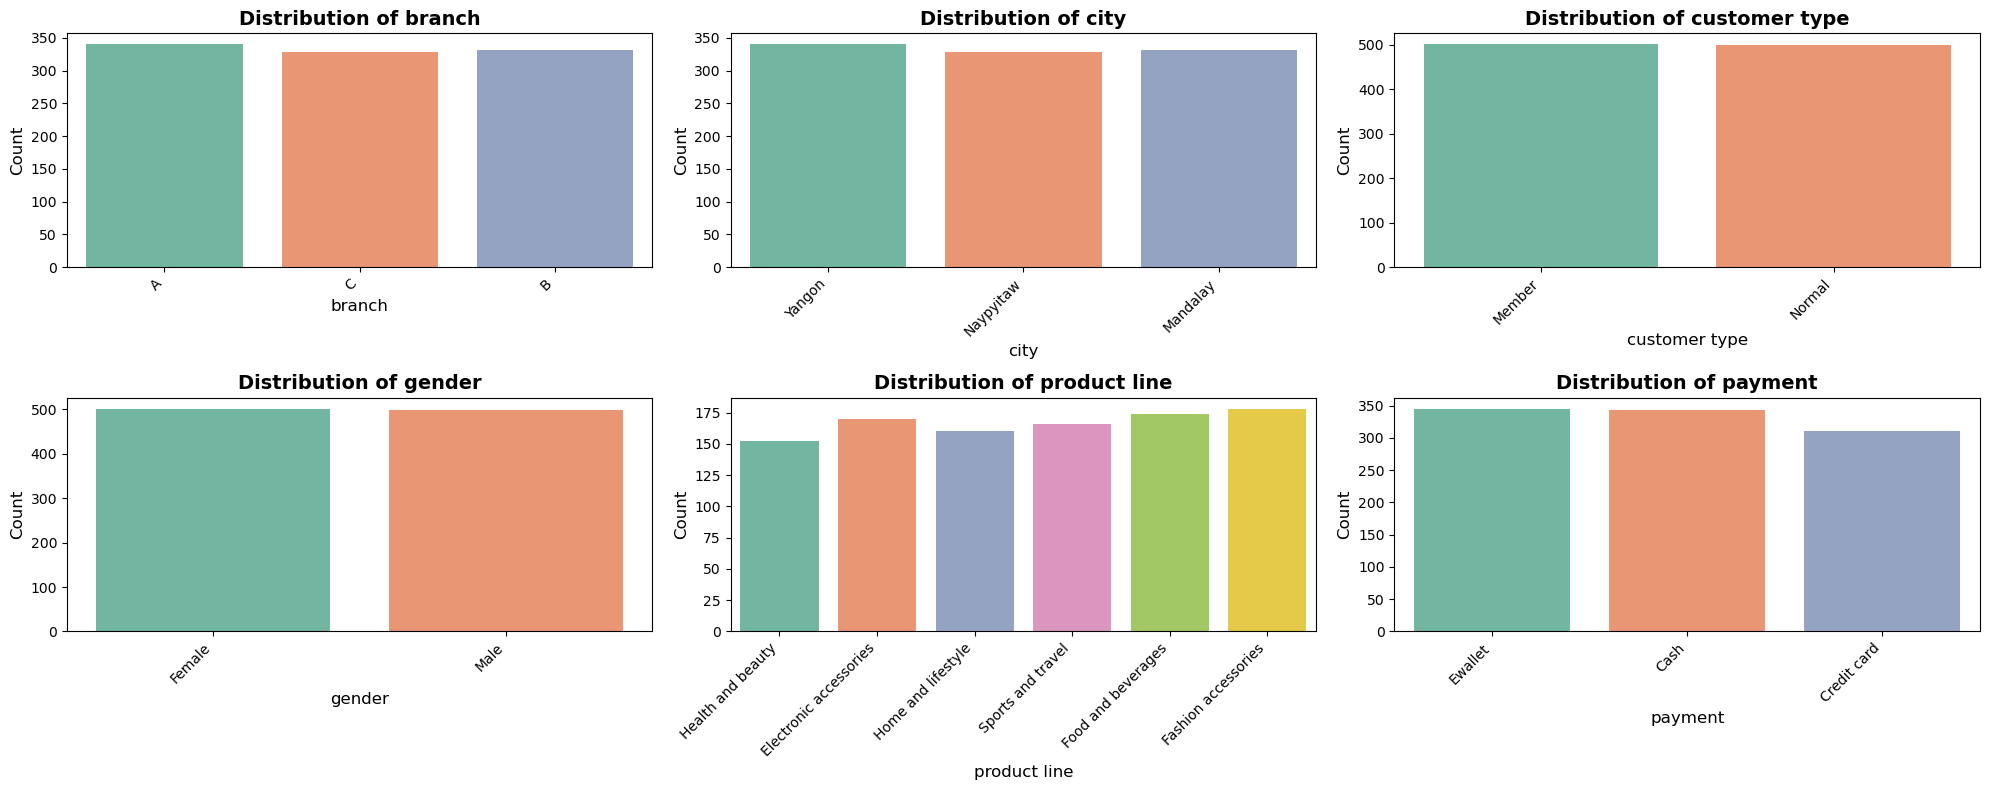

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

s_cols = df.select_dtypes('object')
s_cols = s_cols.iloc[:, 1:]

plt.figure(figsize=(20, 8))

for e, i in enumerate(s_cols.columns):
    plt.subplot(2, 3, e+1)
    palette = sns.color_palette("Set2", n_colors=s_cols[i].nunique())
    sns.countplot(data=s_cols, x=i, palette=palette)
    plt.title('Distribution of ' + i, fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()
